# Single Plot Example

Example plot of results.

In [1]:
import csv
import os
import json
import pickle
from pprint import pprint
import string

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(
    context="paper",
    style="whitegrid",
#     font_scale=2,
    rc={
        'lines.linewidth': 2,
        'xtick.bottom': True,
        'ytick.left': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        'axes.grid.which': 'both'
    }
)

In [2]:
# Use latex for exporting
# mpl.use("pgf")  # can specify this as an argument to savefig() each time
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

## Example

In [4]:
folder_name = "../results/res_20220306_180119/"
with open(folder_name + "config.json", "r") as f:
    config = json.load(f)

with open(folder_name + "results.json", "r") as f:
    results = json.load(f)

pprint(config)

{'discount': 0.999,
 'episode_length': 30,
 'epsilon': 0.3,
 'epsilon_decay_factor': 0.9996,
 'frac_reliable': 0.6666666666666666,
 'noise': 0.1,
 'num_eval_episodes': 2000,
 'num_processes': 9,
 'num_train_episodes': 20000,
 'run_mode': 'trained',
 'step_size': 0.03}


`results` format: list of 2-tuples for each separate run (with different random seed).

Each tuple contains the training and evaluation results respectively, each as a dict.

Each dict contains metric : list of values over episodes 

In [5]:
# Gather results over separate random seeds into lists
all_train_results = []
all_eval_results = []

for train_result, eval_result in results:
    all_train_results.append(train_result)
    all_eval_results.append(eval_result)

In [6]:
print(len(all_train_results))
pprint(list(all_train_results[0].keys()))

print(len(all_eval_results))
pprint(list(all_eval_results[0].keys()))

30
['average_reward',
 'success_rate',
 'average_trust_rate',
 'mutual_trust_rate',
 'average_trust_accuracy']
30
['average_reward',
 'success_rate',
 'average_trust_rate',
 'mutual_trust_rate',
 'average_trust_accuracy']


(30, 1000)


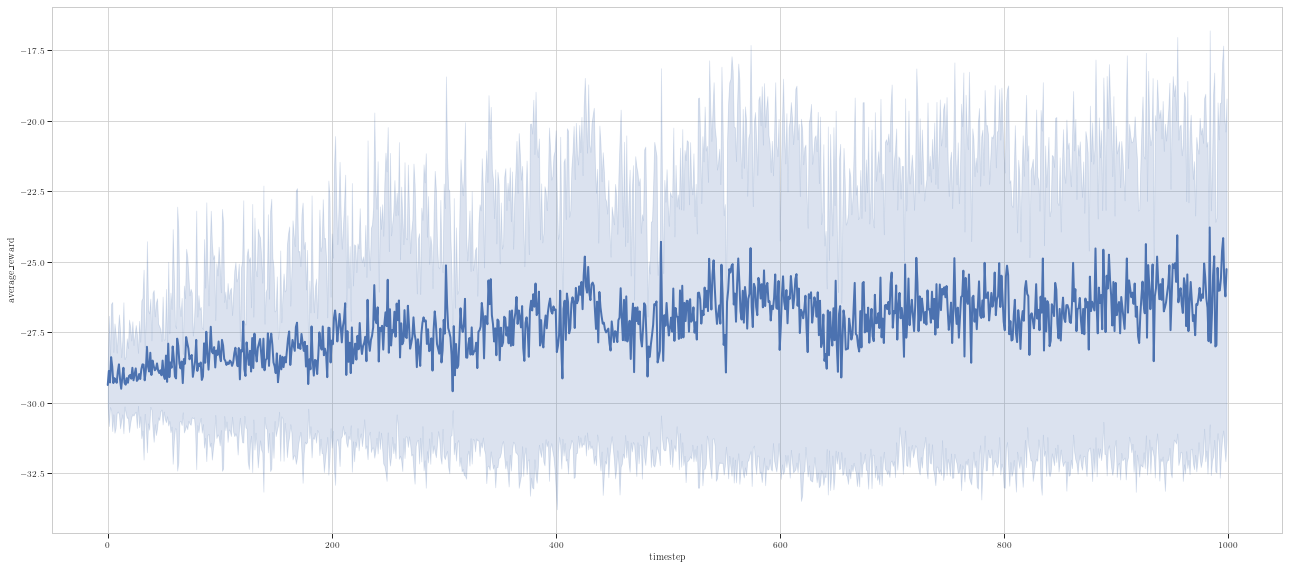

In [7]:
# Plot training curves as an example
fig, ax = plt.subplots(figsize=(18, 8), tight_layout=True)

metric = "average_reward"
data = [item[metric] for item in all_train_results]

data = np.array(data)[:, ::20]
print(data.shape)

df = pd.DataFrame(data)

# Add a column indicating Run number
df = df.reset_index(level=0)
df = df.rename(columns={"index": "run"})

# Move timesteps, originally column labels, to a single column
df = df.melt("run", var_name="timestep", value_name=metric)

df = df.astype({"run": "int64", "timestep": "int64", metric: "float64"})

sns.lineplot(x="timestep", y=metric, data=df, ci="sd", ax=ax);


# fig.savefig("train.pdf", format="pdf")